In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import cv2 # opencv-python, librería de referencia para tratamiento de imagen

![](https://img.devrant.com/devrant/rant/r_1688469_xaXLS.jpg)

In [196]:
train_set = pd.read_csv("train_set.csv")
train_set

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg
...,...,...,...
6171,sadness,11346,sadness/11346.jpg
6172,sadness,4441,sadness/04441.jpg
6173,sadness,15236,sadness/15236.jpg
6174,sadness,27361,sadness/27361.jpg


In [197]:
train_set['path']

0         happy/22373.jpg
1         happy/21433.jpg
2         happy/12418.jpg
3         happy/21278.jpg
4         happy/08081.jpg
              ...        
6171    sadness/11346.jpg
6172    sadness/04441.jpg
6173    sadness/15236.jpg
6174    sadness/27361.jpg
6175    sadness/25239.jpg
Name: path, Length: 6176, dtype: object

In [198]:
train_set['array'] = train_set['path'].apply(lambda x: cv2.imread(("train/" + x),cv2.IMREAD_GRAYSCALE))


In [199]:
train_set

,label,id_img,path,array
0,happy,22373,happy/22373.jpg,"[[25, 44, 56, 68, 88, 98, 93, 92, 105, 120, 13..."
1,happy,21433,happy/21433.jpg,"[[33, 29, 22, 18, 19, 23, 22, 19, 20, 23, 14, ..."
2,happy,12418,happy/12418.jpg,"[[35, 43, 66, 84, 71, 41, 36, 53, 97, 56, 100,..."
3,happy,21278,happy/21278.jpg,"[[118, 124, 132, 126, 127, 139, 67, 38, 33, 29..."
4,happy,8081,happy/08081.jpg,"[[201, 209, 193, 107, 106, 107, 98, 114, 144, ..."
...,...,...,...,...
6171,sadness,11346,sadness/11346.jpg,"[[167, 180, 196, 171, 101, 50, 52, 70, 55, 49,..."
6172,sadness,4441,sadness/04441.jpg,"[[163, 154, 128, 116, 121, 106, 90, 99, 115, 1..."
6173,sadness,15236,sadness/15236.jpg,"[[109, 25, 29, 33, 55, 65, 82, 87, 147, 179, 1..."
6174,sadness,27361,sadness/27361.jpg,"[[62, 64, 67, 52, 57, 65, 50, 55, 117, 179, 15..."


Las imágenes están en blanco y negro, pero el método `cv2.imread` necesita que se le especifique el segundo argumento como 0 ya que por defecto leerá en color. 

`flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR`
[para más info...](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/)


In [137]:
drama = cv2.imread("train/" + train_set.path[0], 0) 
drama

array([[ 25,  44,  56, ...,  34,  11,  17],
       [ 30,  46,  54, ...,  45,  19,  17],
       [ 38,  50,  55, ...,  53,  25,  12],
       ...,
       [110, 116, 129, ...,  40,  63,  34],
       [110, 138, 135, ...,  51,  52,  30],
       [ 93, 142, 127, ...,  73,  48,  33]], dtype=uint8)

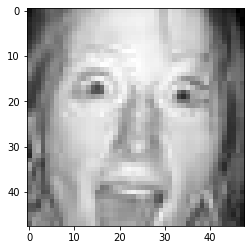

In [7]:
plt.imshow(drama, cmap = 'gray')

In [8]:
drama.shape

(48, 48)

##### Ten en cuenta que las imágenes no están mezcladas, están primero las fotos felices y luego todas las fotos tristes.

In [9]:
train_set[train_set.label == "happy"].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284],
           dtype='int64', length=3285)

In [10]:
train_set[train_set.label == "sadness"].index

Int64Index([3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294,
            ...
            6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175],
           dtype='int64', length=2891)

Accedemos a las imágenes directamente en sus carpetas, puedes usar librerías como `glob` o nuestro ya viejo conocido, `os`.
Para cargar y mostrar las imágenes `imageio` o como ya hemos visto `cv2`.

**Disclaimer** Para gestionar imágenes no es necesario cargar los arrays en nuestro jupyter. 

https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
from sklearn.model_selection import train_test_split

In [203]:
X = train_set.drop(['label','path','id_img'],axis=1)
y = train_set['label']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [206]:
X_train = X_train/255
X_test = X_test/255

In [207]:
X_val = X_train[-200:]
y_val = y_train[-200:]

X_train = X_train[:-200]
y_train = y_train[:-200]

In [209]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(48,48)))
model.add(keras.layers.Dense(units=300, activation='relu'))
model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(units=50, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='softmax'))



In [210]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

In [211]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 300)               691500    
                                                                 
 dense_7 (Dense)             (None, 150)               45150     
                                                                 
 dense_8 (Dense)             (None, 50)                7550      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 744,251
Trainable params: 744,251
Non-trainable params: 0
_________________________________________________________________


In [212]:
history = model.fit(X_train,y_train,batch_size=120,epochs=20, validation_data=(X_val,y_val))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).